In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.feature
import skimage.filters
import skimage.transform
import scipy
import numpy as np
import sklearn

In [2]:
im = skimage.io.imread('/d/blimp/c2.jpg')
gi = skimage.color.rgb2gray(im)

In [3]:
th = skimage.filters.threshold_adaptive(gi, block_size=95, method='mean')
# skimage.io.imshow(th)
gi.shape

(1400, 850)

<IPython.core.display.Javascript object>


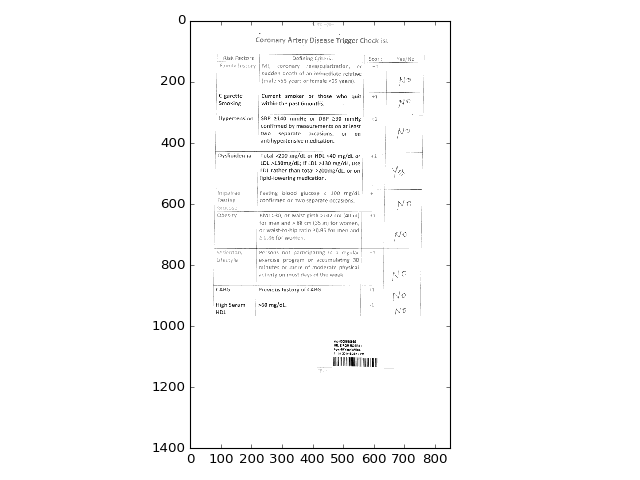

In [4]:
skimage.io.imshow(skimage.exposure.adjust_gamma(gi, gamma=2))

In [5]:
adapted = skimage.exposure.equalize_adapthist(gi, kernel_size=50, nbins=10)
ad = skimage.filters.threshold_adaptive(adapted, block_size=35)
skimage.io.imshow(ad)
skimage.io.imshow(adapted)

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


<IPython.core.display.Javascript object>


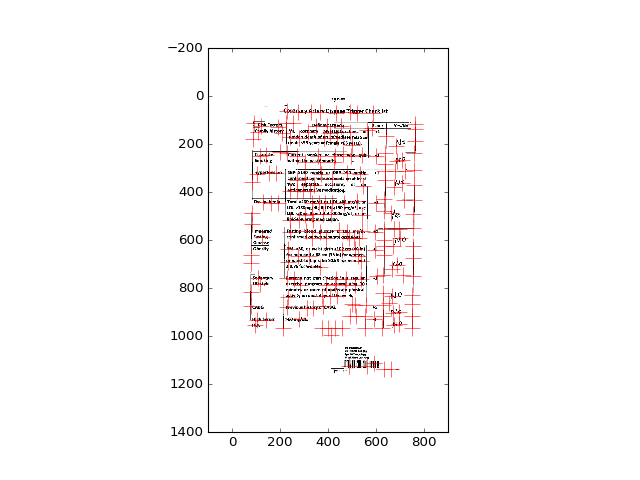

In [6]:
coor = skimage.feature.corner_peaks(skimage.feature.corner_harris(ad, k=0), min_distance=20)
coors = skimage.feature.corner_subpix(ad, coor, window_size=30)

fig, ax = plt.subplots()
ax.imshow(ad, cmap=plt.cm.gray)
# ax.plot(coor[:, 1], coor[:, 0], '.b', markersize=3)
ax.plot(coors[:, 1], coors[:, 0], '+r', markersize=15)

<IPython.core.display.Javascript object>


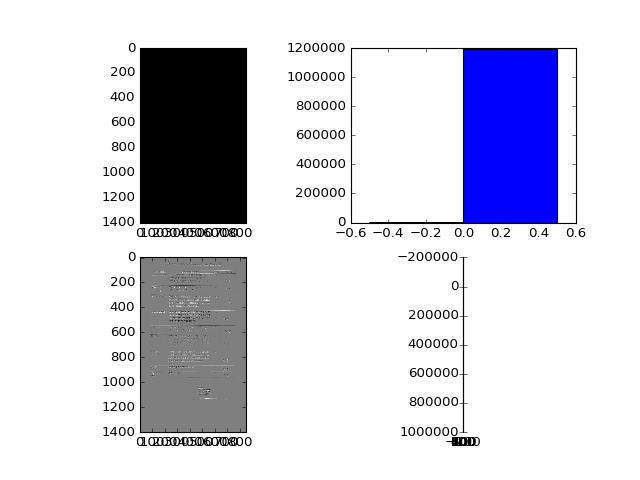

In [7]:
def plot_rotated_img(im, angle, fig):
    imsc = skimage.transform.rescale(im, 1)
    rim = skimage.transform.rotate(imsc, angle, cval=1)
    img_v = skimage.feature.canny(rim, sigma=10)
    img_h = skimage.filters.prewitt_h(rim)
    
    plt.subplot(2, 2, 1).imshow(img_v, cmap=plt.cm.gray)
    plt.subplot(2, 2, 3).imshow(img_h, cmap=plt.cm.gray)

    plt.subplot(2, 2, 2).hist(img_v.ravel(), bins=2)
    plt.subplot(2, 2, 4).hist(img_h.ravel(), bins=200)

plot_rotated_img(gi, 0, plt.figure())
    

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


<IPython.core.display.Javascript object>


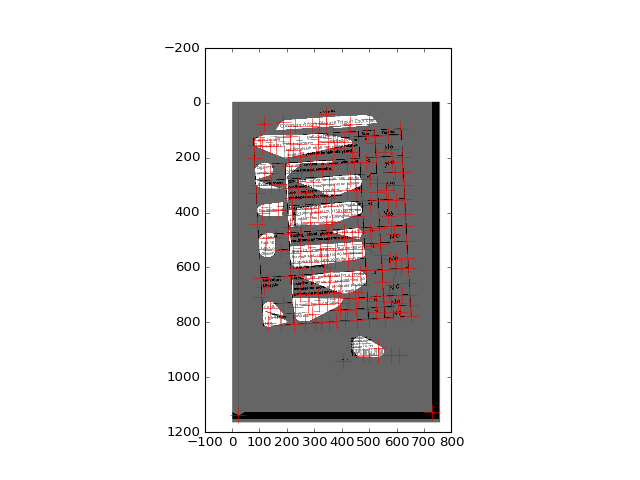

In [9]:

angle = 4

im = gi.copy()
imsc = skimage.transform.rescale(im, 0.8)
rim = skimage.transform.rotate(imsc, angle, cval=1, resize=True)

adapted = skimage.exposure.equalize_adapthist(rim, kernel_size=50, nbins=10)
aim = skimage.filters.threshold_adaptive(adapted, block_size=35)


img_v = skimage.feature.canny(rim, sigma=20, use_quantiles=True, high_threshold=0.9)
imc = skimage.morphology.convex_hull_object(img_v, neighbors=8)


coor = skimage.feature.corner_peaks(skimage.feature.corner_harris(aim, k=0), min_distance=20)
coors = skimage.feature.corner_subpix(rim, coor, window_size=30)

plt.imshow(imc, cmap=plt.cm.gray)
plt.imshow(aim, cmap=plt.cm.gray, alpha=0.4)
plt.plot(coor[:, 1], coor[:, 0], '+r', markersize=15)    

In [1]:

adapted = skimage.exposure.equalize_adapthist(gi.copy(), kernel_size=50, nbins=10)
aim = skimage.filters.threshold_adaptive(adapted, block_size=35)

img = skimage.transform.rotate(aim, 0, resize=True, cval=1)
theta = np.deg2rad(np.arange(-5, 5, 0.05))

edges = skimage.feature.canny(img, 1)
lines = skimage.transform.probabilistic_hough_line(edges, threshold=100, line_length=100,
                                 line_gap=3, theta=theta)

# Generating figure 2.
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, figsize=(12, 6),
                                    sharey=True)
plt.tight_layout()

ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()
ax0.set_adjustable('box-forced')

ax1.imshow(edges, cmap=plt.cm.gray)
ax1.set_title('Canny edges')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(edges * 0)
slopes = []
for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

    slopes.append((p1[1] - p0[1]) / (p1[0] - p0[0]))

sk = np.rad2deg(np.arctan(scipy.stats.mode(slopes)[0]))[0]
print('Guessed Image Skew (deg):', sk)

row2, col2 = img.shape
ax2.axis((0, col2, row2, 0))

ax3.imshow(skimage.transform.rotate(aim, 90 + sk, resize=True, cval=1), cmap=plt.cm.gray)


NameError: name 'skimage' is not defined